In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from k_means import k_means

In [ ]:
kinetic_data = np.loadtxt("../../data/rate_vs_conc-1.dat")
kinetic_data = pd.DataFrame(kinetic_data, columns=["Substrate", "Rate"])
kinetic_data.head()

In [ ]:
def michaelis_menten(s, v_max, k_m):
    return (v_max * s) / (k_m + s)

In [ ]:
s = kinetic_data["Substrate"].to_numpy()
rate = kinetic_data["Rate"].to_numpy()
beta_hat, cov = curve_fit(michaelis_menten, s, rate)
v_max, k_m = beta_hat
print("v_max:", v_max)
print("k_m", k_m)
print("Covariance Matrix:")
print(cov)
print("Variance - v_max:", cov[0][0])
print("Variance - k_m:", cov[1][1])

In [ ]:
y_hat = michaelis_menten(s, v_max, k_m)
plt.figure()

plt.plot(s, y_hat, label="M-M Curve Fit", color="Red")
plt.scatter(s, rate, label="Kinetic Data", color="Black")
plt.xlabel("[Substrate] (M)")
plt.ylabel("Rate (M/s)")
plt.legend()
plt.title("Nonlinear Fit - Michaelis Menten Kinetics")
plt.savefig("../../data/michaelis_menten.png")
plt.show()

In [2]:
cluster_data = np.loadtxt("../../data/clust_data-1.dat")
cluster_data

array([[-1.1339681 ,  2.8831157 ],
       [ 1.1843365 ,  2.6798038 ],
       [-4.5383877 ,  3.8175163 ],
       [-0.19499936,  3.4901592 ],
       [-0.63064436,  3.7652512 ],
       [-1.7356955 ,  3.778279  ],
       [ 2.9580958 ,  1.5196948 ],
       [-1.2028138 ,  3.540364  ],
       [ 2.6218993 ,  2.908461  ],
       [ 3.9275227 ,  2.2397476 ],
       [ 0.52938876,  2.3064046 ],
       [ 1.833398  ,  4.2814578 ],
       [ 2.9185519 ,  2.1902624 ],
       [ 0.75706595,  1.7631816 ],
       [ 2.6226104 ,  3.2146864 ],
       [-2.7876945 ,  5.0107718 ],
       [ 4.3312715 ,  3.0255544 ],
       [-1.968688  ,  3.3082994 ],
       [-4.4865078 ,  2.0617528 ],
       [ 5.1534955 ,  4.674216  ],
       [ 0.81181962,  3.1249882 ],
       [ 2.3467634 ,  3.5301013 ],
       [-0.08977542,  2.0479318 ],
       [-2.0617502 ,  3.8540428 ],
       [-8.2189656 ,  3.3891457 ],
       [ 2.878837  ,  1.8439989 ],
       [ 0.1399464 ,  3.0397401 ],
       [ 0.40797128,  2.5494014 ],
       [ 2.2168161 ,

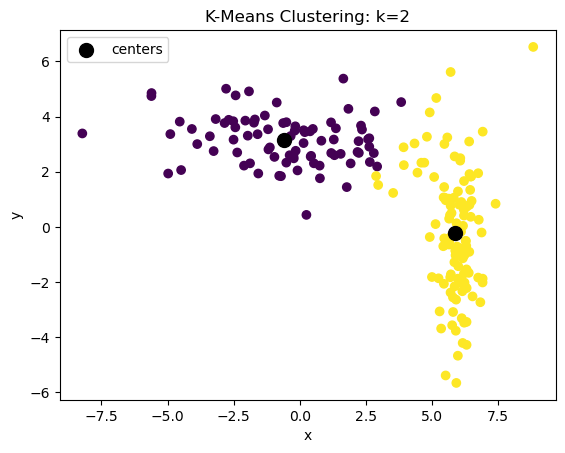

In [24]:
centers, clusters  = k_means(cluster_data, k=2)
plt.figure()
plt.scatter(cluster_data[:, 0], cluster_data[:, 1], c=clusters)
plt.scatter(centers[:, 0], centers[:, 1], label='centers', s=100, c='black')
plt.legend()
plt.title("K-Means Clustering: k=2")
plt.xlabel("x")
plt.ylabel("y")
plt.savefig("../../data/k_means_2.png")
plt.show()

In [25]:
print("Cluster means k=2: ")
print("Cluster 1:", centers[0, :])
print("Cluster 2:", centers[1, :])

Cluster means k=2: 
Cluster 1: [-0.60854901  3.16366945]
Cluster 2: [ 5.8439165  -0.22208368]


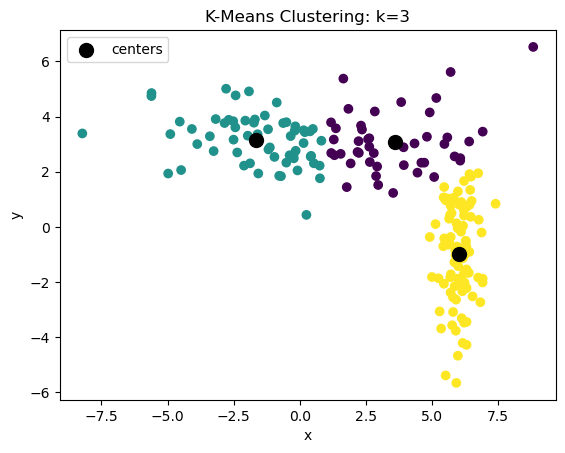

In [29]:
centers, clusters  = k_means(cluster_data, k=3)
plt.figure()
plt.scatter(cluster_data[:, 0], cluster_data[:, 1], c=clusters)
plt.scatter(centers[:, 0], centers[:, 1], label='centers', s=100, c='black')
plt.legend()
plt.title("K-Means Clustering: k=3")
plt.xlabel("x")
plt.ylabel("y")
plt.savefig("../../data/k_means_3.png")
plt.show()

In [27]:
print("Cluster means k=2: ")
print("Cluster 1:", centers[0, :])
print("Cluster 2:", centers[1, :])
print("Cluster 3:", centers[2, :])

Cluster means k=2: 
Cluster 1: [ 6.01825375 -0.96483458]
Cluster 2: [3.5807373  3.07755877]
Cluster 3: [-1.6606437   3.16283192]


In [28]:
centers, clusters  = k_means(cluster_data, k=3)
print("Cluster means k=2: ")
print("Cluster 1:", centers[0, :])
print("Cluster 2:", centers[1, :])
print("Cluster 3:", centers[2, :])

Cluster means k=2: 
Cluster 1: [-1.2986962   3.20428258]
Cluster 2: [ 6.02035586 -1.6323271 ]
Cluster 3: [4.80123969 2.27061851]


The clusters are based off of the initial guesses which are random, so repeated trials gives similar but not exactly identical results